# Strategic Loan Insights & Risk Monitoring 

In [7]:
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load your data
df = pd.read_csv("C:/Users/DELL'/Music/project- loan/financial_loan.csv")  # or your source
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y')

# Create Month and Year columns
df['Month'] = df['issue_date'].dt.month
df['MonthName'] = df['issue_date'].dt.strftime('%b')
df['Year'] = df['issue_date'].dt.year



###  1. KPI Cards (Total applications, funded, received)

In [8]:
total_applications = df['id'].count()
total_funded = df['loan_amount'].sum()
total_received = df['total_payment'].sum()

print(f"Total Applications: {total_applications:,}")
print(f"Total Funded Amount: ${total_funded / 1e6:.2f}M")
print(f"Total Amount Received: ${total_received / 1e6:.2f}M")


Total Applications: 38,576
Total Funded Amount: $435.76M
Total Amount Received: $473.07M


In [22]:
import pandas as pd
from datetime import datetime

# Set today's date (for report reference)
today = pd.to_datetime('2024-12-31')  # Adjust if needed

# Convert issue_date to datetime
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y', errors='coerce')

# Month/Year logic
current_month = today.month
previous_month = current_month - 1 if current_month > 1 else 12
current_year = today.year
previous_year = current_year if previous_month != 12 else current_year - 1

# Filters
df_mtd = df[(df['issue_date'].dt.month == current_month) & (df['issue_date'].dt.year == current_year)]
df_pmtd = df[(df['issue_date'].dt.month == previous_month) & (df['issue_date'].dt.year == previous_year)]
df_good = df[df['loan_status'].isin(['Fully Paid', 'Current'])]
df_bad = df[df['loan_status'] == 'Charged Off']

# --- KPI Calculations ---

total_apps = df['id'].count()
mtd_apps = df_mtd['id'].count()
pmtd_apps = df_pmtd['id'].count()

total_funded = df['loan_amount'].sum()
mtd_funded = df_mtd['loan_amount'].sum()
pmtd_funded = df_pmtd['loan_amount'].sum()

total_received = df['total_payment'].sum()
mtd_received = df_mtd['total_payment'].sum()
pmtd_received = df_pmtd['total_payment'].sum()

# --- Good/Bad Loans ---

good_apps = df_good['id'].count()
bad_apps = df_bad['id'].count()

good_funded = df_good['loan_amount'].sum()
bad_funded = df_bad['loan_amount'].sum()

good_received = df_good['total_payment'].sum()
bad_received = df_bad['total_payment'].sum()

# --- Good/Bad Loan % ---

good_pct = (good_apps * 100.0) / total_apps
bad_pct = (bad_apps * 100.0) / total_apps

# --- Print Everything Like a Dashboard ---

print("📊 LOAN KPI SUMMARY")
print("─────────────────────────────")
print(f"📌 Total Applications     : {total_apps:,}")
print(f"📆 MTD Applications       : {mtd_apps:,}")
print(f"📆 PMTD Applications      : {pmtd_apps:,}\n")

print(f"💰 Total Funded Amount    : ${total_funded:,.0f}")
print(f"💰 MTD Funded Amount      : ${mtd_funded:,.0f}")
print(f"💰 PMTD Funded Amount     : ${pmtd_funded:,.0f}\n")

print(f"💵 Total Amount Received  : ${total_received:,.0f}")
print(f"💵 MTD Amount Received    : ${mtd_received:,.0f}")
print(f"💵 PMTD Amount Received   : ${pmtd_received:,.0f}\n")

print("✅ GOOD LOANS")
print(f"✔️ Applications           : {good_apps:,} ({good_pct:.2f}%)")
print(f"✔️ Funded Amount          : ${good_funded:,.0f}")
print(f"✔️ Amount Received        : ${good_received:,.0f}\n")

print("❌ BAD LOANS")
print(f"✖️ Applications           : {bad_apps:,} ({bad_pct:.2f}%)")
print(f"✖️ Funded Amount          : ${bad_funded:,.0f}")
print(f"✖️ Amount Received        : ${bad_received:,.0f}")


📊 LOAN KPI SUMMARY
─────────────────────────────
📌 Total Applications     : 38,576
📆 MTD Applications       : 4,314
📆 PMTD Applications      : 4,035

💰 Total Funded Amount    : $435,757,075
💰 MTD Funded Amount      : $53,981,425
💰 PMTD Funded Amount     : $47,754,825

💵 Total Amount Received  : $473,071,176
💵 MTD Amount Received    : $58,074,440
💵 PMTD Amount Received   : $50,132,030

✅ GOOD LOANS
✔️ Applications           : 33,243 (86.18%)
✔️ Funded Amount          : $370,224,850
✔️ Amount Received        : $435,786,413

❌ BAD LOANS
✖️ Applications           : 5,333 (13.82%)
✖️ Funded Amount          : $65,532,225
✖️ Amount Received        : $37,284,763


In [35]:
# Clean loan_status values

df['loan_status'] = df['loan_status'].str.strip().str.title()

# Count applications per loan status
loan_status_counts = df['loan_status'].value_counts().reset_index()
loan_status_counts.columns = ['Loan Status', 'Application Count']

# Display the result
print(loan_status_counts)


   Loan Status  Application Count
0   Fully Paid              32145
1  Charged Off               5333
2      Current               1098


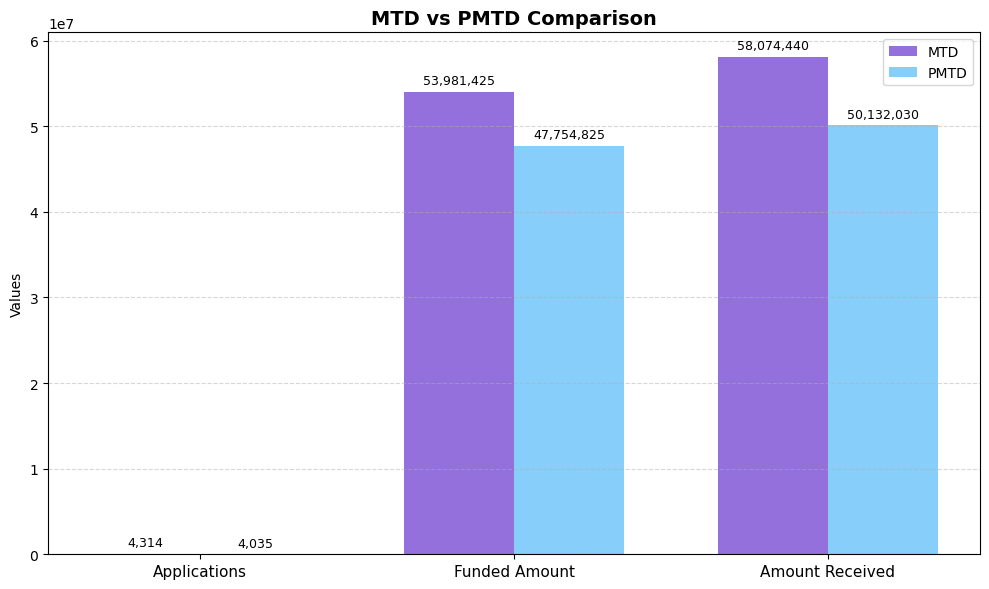

In [29]:
import matplotlib.pyplot as plt

# Data for the bar chart
categories = ['Applications', 'Funded Amount', 'Amount Received']
mtd_values = [mtd_apps, mtd_funded, mtd_received]
pmtd_values = [pmtd_apps, pmtd_funded, pmtd_received]

x = range(len(categories))  # X-axis positions

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35

# MTD bars
plt.bar([i - bar_width/2 for i in x], mtd_values, width=bar_width, color='mediumpurple', label='MTD')
# PMTD bars
plt.bar([i + bar_width/2 for i in x], pmtd_values, width=bar_width, color='lightskyblue', label='PMTD')

# To Add value labels on top
for i, val in enumerate(mtd_values):
    plt.text(i - bar_width/2, val + max(mtd_values)*0.01, f"{int(val):,}", ha='center', va='bottom', fontsize=9)
for i, val in enumerate(pmtd_values):
    plt.text(i + bar_width/2, val + max(pmtd_values)*0.01, f"{int(val):,}", ha='center', va='bottom', fontsize=9)

# For Styling
plt.xticks(x, categories, fontsize=11)
plt.title('MTD vs PMTD Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Values')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 2. Good vs Bad Loan 

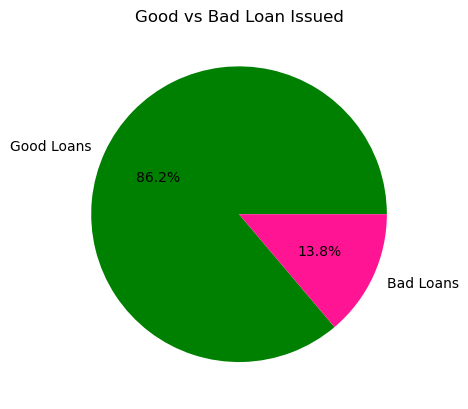

In [9]:
good = df[df['loan_status'].isin(['Fully Paid', 'Current'])].shape[0]
bad = df[df['loan_status'] == 'Charged Off'].shape[0]

plt.pie([good, bad], labels=['Good Loans', 'Bad Loans'], autopct='%1.1f%%', colors=['green', 'deeppink'])
plt.title("Good vs Bad Loan Issued")
plt.show()


#### 3. Total Funded Amount by Month 



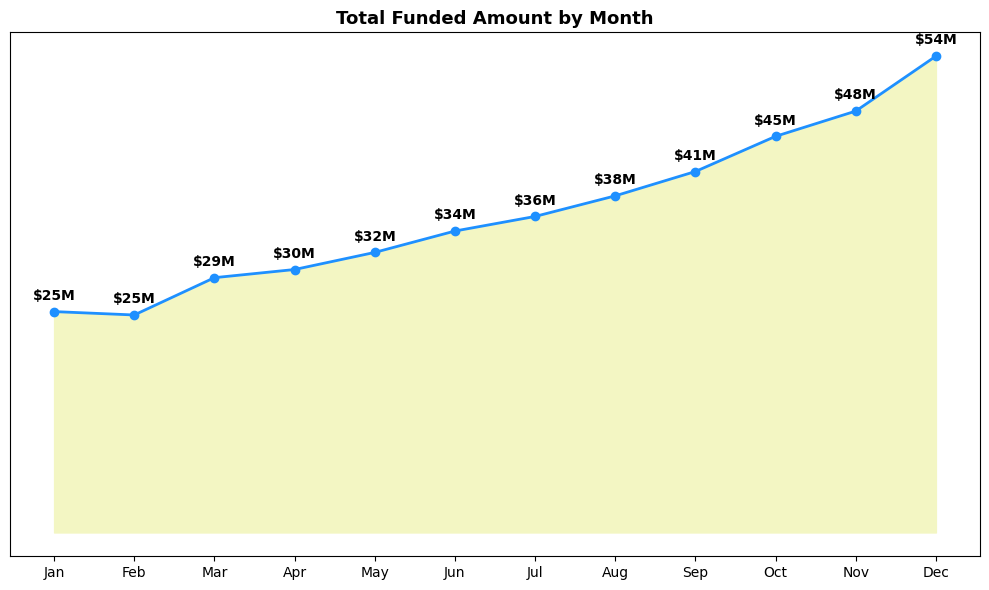

In [13]:
import matplotlib.pyplot as plt


monthly_funds = df.groupby('MonthName')['loan_amount'].sum().reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

monthly_millions = monthly_funds / 1e6

# To Plot with fill
plt.figure(figsize=(10, 6))
plt.fill_between(monthly_millions.index, monthly_millions.values, color='#F3F6C3')  # soft yellow like Power BI
plt.plot(monthly_millions.index, monthly_millions.values, marker='o', color='dodgerblue', linewidth=2)

# To Annotate values above points
for i, value in enumerate(monthly_millions.values):
    plt.text(i, value + 1, f"${value:.0f}M", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Title 
plt.title('Total Funded Amount by Month', fontsize=13, fontweight='bold')


plt.yticks([])  # remove y-axis values
plt.ylabel('')  # remove y-axis label

# To Clean X-axis
plt.xticks(fontsize=10)
plt.grid(False)

plt.tight_layout()
plt.show()

 



####  4. Total Loan Applications by State

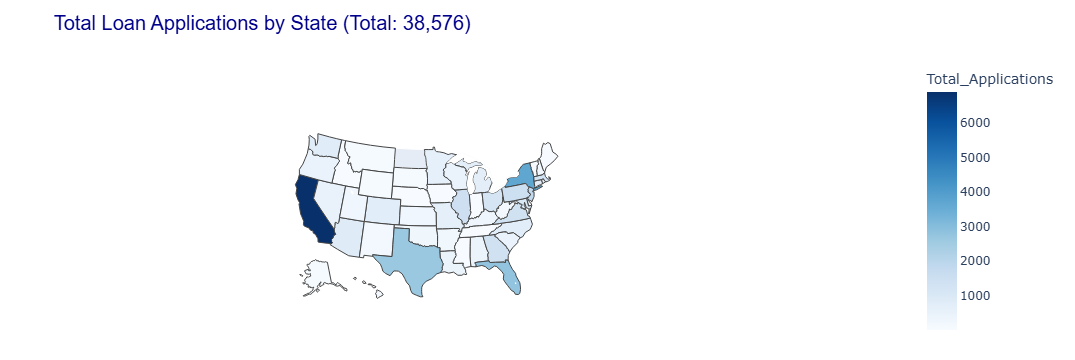

In [15]:
import plotly.express as px

# To Group data by state
state_counts = df.groupby('address_state')['id'].count().reset_index()
state_counts.columns = ['address_state', 'Total_Applications']

# To Calculate total applications
total_apps = state_counts['Total_Applications'].sum()

# To Create map
fig = px.choropleth(
    state_counts,
    locations='address_state',
    locationmode='USA-states',
    color='Total_Applications',
    scope='usa',
    title=f'Total Loan Applications by State (Total: {total_apps:,})',
    color_continuous_scale='Blues'
)

fig.update_layout(
    title_font=dict(size=20, family='Arial', color='darkblue'),
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    margin=dict(l=20, r=20, t=60, b=20)
)

fig.show()



In [2]:
pip install pypandoc


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [21]:
import pandas as pd
from datetime import datetime

# Assume issue_date is already in datetime format
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y', errors='coerce')

# Set reference date to today (or override with your report date)
today = pd.to_datetime('2024-12-31')  # Example: Dec 2024

# Extract current and previous month
current_month = today.month
previous_month = current_month - 1 if current_month > 1 else 12
current_year = today.year
previous_year = current_year if previous_month != 12 else current_year - 1

# --- Total Loan Applications ---
total_apps = df['id'].count()

# --- MTD Applications ---
mtd_apps = df[(df['issue_date'].dt.month == current_month) & 
              (df['issue_date'].dt.year == current_year)]['id'].count()

# --- PMTD Applications ---
pmtd_apps = df[(df['issue_date'].dt.month == previous_month) & 
               (df['issue_date'].dt.year == previous_year)]['id'].count()

# --- Good Loan Applications ---
good_apps = df[df['loan_status'].isin(['Fully Paid', 'Current'])]['id'].count()

# --- Bad Loan Applications ---
bad_apps = df[df['loan_status'] == 'Charged Off']['id'].count()

# --- MTD Good Loans ---
mtd_good_apps = df[(df['issue_date'].dt.month == current_month) & 
                   (df['loan_status'].isin(['Fully Paid', 'Current']))]['id'].count()

# --- PMTD Good Loans ---
pmtd_good_apps = df[(df['issue_date'].dt.month == previous_month) & 
                    (df['loan_status'].isin(['Fully Paid', 'Current']))]['id'].count()

# --- MTD Bad Loans ---
mtd_bad_apps = df[(df['issue_date'].dt.month == current_month) & 
                  (df['loan_status'] == 'Charged Off')]['id'].count()

# --- PMTD Bad Loans ---
pmtd_bad_apps = df[(df['issue_date'].dt.month == previous_month) & 
                   (df['loan_status'] == 'Charged Off')]['id'].count()

# Print all results like dashboard
print(f"📌 Total Applications: {total_apps:,}")
print(f"📆 MTD Applications (Dec): {mtd_apps:,}")
print(f"📆 PMTD Applications (Nov): {pmtd_apps:,}")

print(f"✅ Good Loan Applications: {good_apps:,}")
print(f"❌ Bad Loan Applications: {bad_apps:,}")

print(f"✅ MTD Good Loans: {mtd_good_apps:,}")
print(f"✅ PMTD Good Loans: {pmtd_good_apps:,}")

print(f"❌ MTD Bad Loans: {mtd_bad_apps:,}")
print(f"❌ PMTD Bad Loans: {pmtd_bad_apps:,}")


📌 Total Applications: 38,576
📆 MTD Applications (Dec): 4,314
📆 PMTD Applications (Nov): 4,035
✅ Good Loan Applications: 33,243
❌ Bad Loan Applications: 5,333
✅ MTD Good Loans: 3,665
✅ PMTD Good Loans: 3,474
❌ MTD Bad Loans: 649
❌ PMTD Bad Loans: 561


#### Purpose

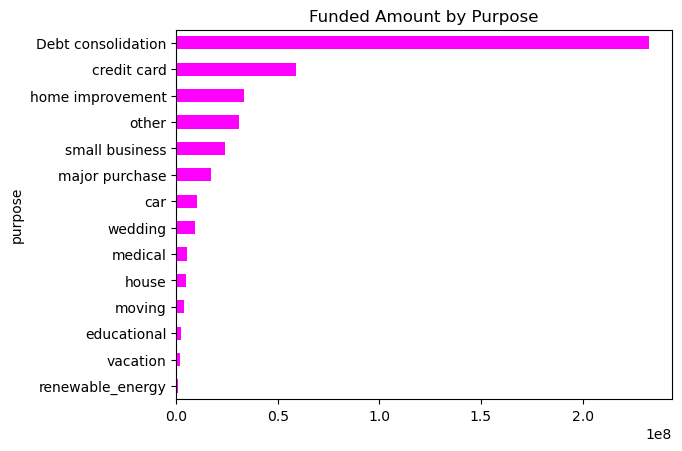

In [16]:
purpose = df.groupby('purpose')['loan_amount'].sum().sort_values()
purpose.plot(kind='barh', color='magenta', title='Funded Amount by Purpose')
plt.show()


#### Employee Length

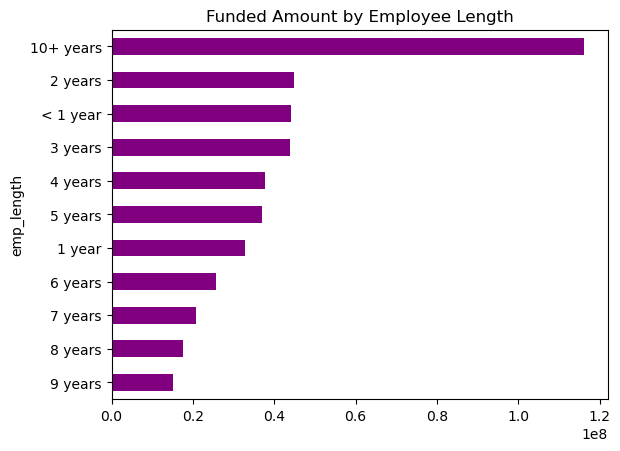

In [17]:
emp_len = df.groupby('emp_length')['loan_amount'].sum().sort_values()
emp_len.plot(kind='barh', color='purple', title='Funded Amount by Employee Length')
plt.show()


#### Home Ownership

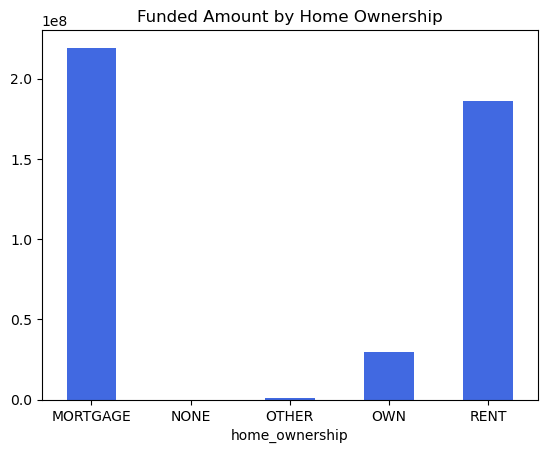

In [18]:
home = df.groupby('home_ownership')['loan_amount'].sum()
home.plot(kind='bar', color='royalblue', title='Funded Amount by Home Ownership')
plt.xticks(rotation=0)
plt.show()


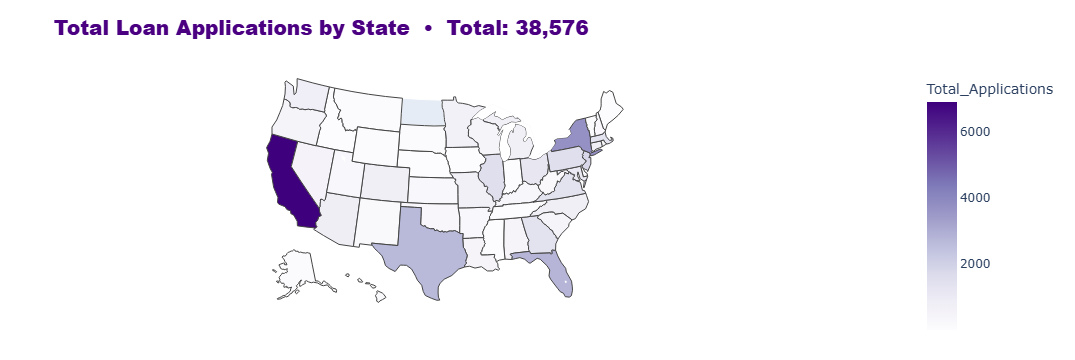

In [20]:
import plotly.express as px

# Group data by state
state_counts = df.groupby('address_state')['id'].count().reset_index()
state_counts.columns = ['address_state', 'Total_Applications']

# Calculate total loan applications
total_apps = state_counts['Total_Applications'].sum()

# Build choropleth map
fig = px.choropleth(
    state_counts,
    locations='address_state',
    locationmode='USA-states',
    color='Total_Applications',
    scope='usa',
    title=f'Total Loan Applications by State  •  Total: {total_apps:,}',
    color_continuous_scale='Purples'  # Power BI-style purple 💜
)

# Style adjustments
fig.update_layout(
    title_font=dict(size=20, family='Arial Black', color='indigo'),
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    margin=dict(l=20, r=20, t=70, b=20)
)

fig.show()
